In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Downloads/Zomato data .csv")

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [6]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Convert the data type of Column- Rate 

In [7]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)

df['rate']=df['rate'].apply(handleRate)

In [8]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of Restaurant

C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_11100\2803556828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['listed_in(type)'], palette='bright')


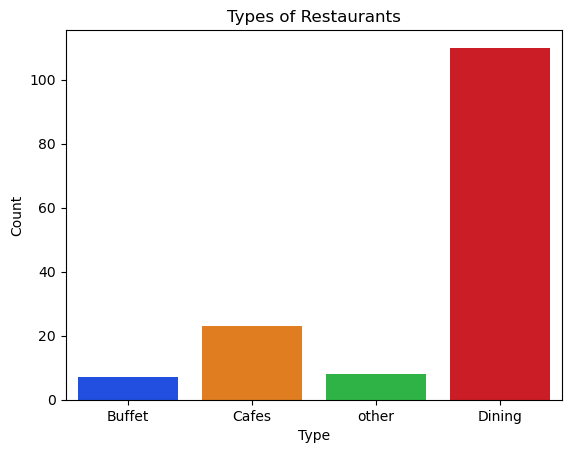

In [11]:
sns.countplot(x=df['listed_in(type)'], palette='bright')
plt.title("Types of Restaurants")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


_Conclusion- Majority of the restaurants fall in 'dining' category_

# Type of Restaurants vs Votes

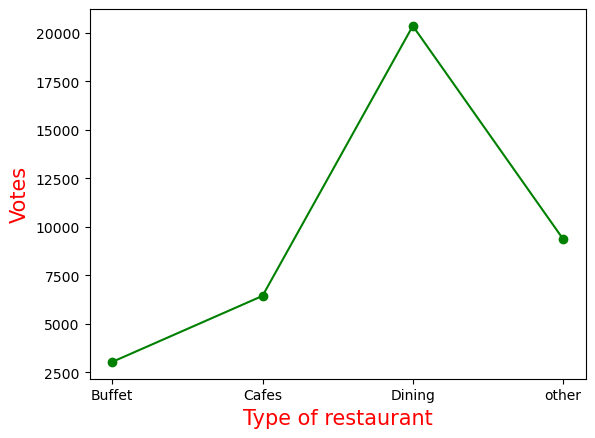

In [19]:
grouped_data=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=15)
plt.ylabel("Votes", c="red", size=15)
plt.show()

_Conclusion- Dining Restaurants have received the maximum votes_

# Majority Ratings

In [20]:
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


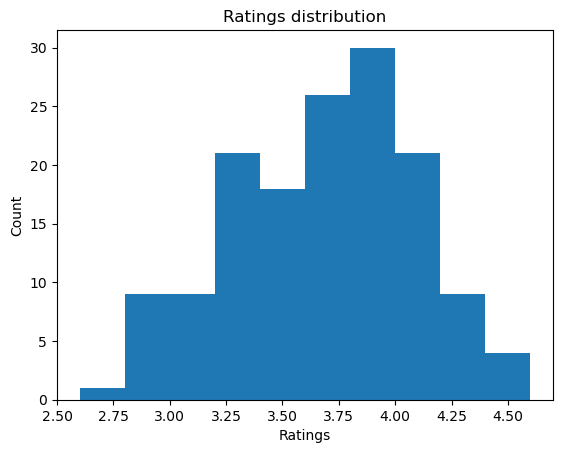

In [25]:
plt.hist(df['rate'], bins=10)
plt.title("Ratings distribution")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

_Conclusion- The majority of restaurants have received ratings between 3.5 to 4_

# Average spending on orders by couples

In [26]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_11100\875317269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette='pastel')


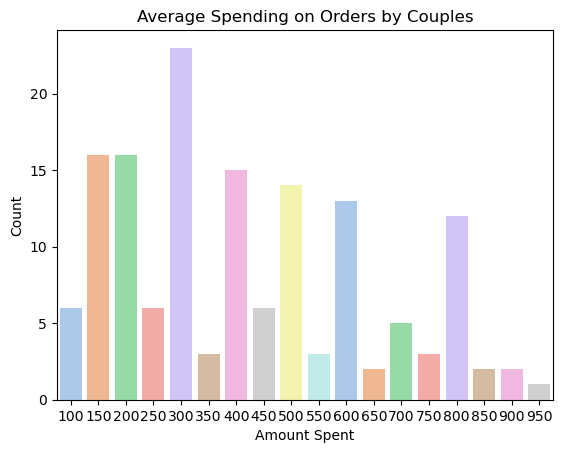

In [29]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data, palette='pastel')
plt.xlabel("Amount Spent")
plt.ylabel("Count")
plt.title("Average Spending on Orders by Couples")
plt.show()

_Conclusion- The majority of couples prefer restaurants with an approximate cost of 300 rupees_

# Maximum Rated Mode(Online/Offline)

In [31]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


C:\Users\Hritwik Das\AppData\Local\Temp\ipykernel_11100\901560408.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df, palette='bright')


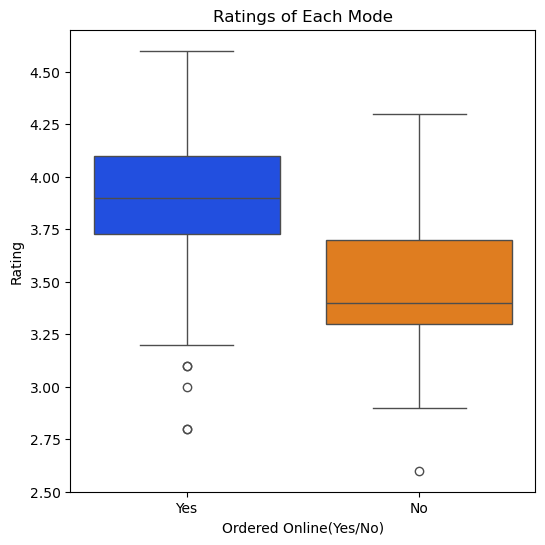

In [33]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df, palette='bright')
plt.xlabel("Ordered Online(Yes/No)")
plt.ylabel("Rating")
plt.title("Ratings of Each Mode")
plt.show()

_Conclusion: Online orders received higher ratings than offline orders_

# Which type of restaurants received maximum offline orders?

In [34]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


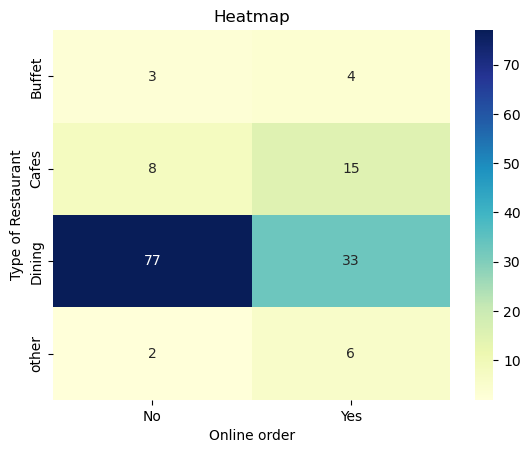

In [35]:
pivot_table=df.pivot_table(index='listed_in(type)', columns="online_order", aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Type of Restaurant")
plt.show()
                           

_Conclusion: Clients prefer orders in person at restaurants, but prefer online order at cafes_